In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from tensorflow import keras
from tensorflow.keras import layers
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer-prediction/lung_cancer_data.csv


2024-07-07 20:41:47.591929: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-07 20:41:47.592061: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-07 20:41:47.760732: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Import Data

In [2]:
data = pd.read_csv('/kaggle/input/lung-cancer-prediction/lung_cancer_data.csv')
data.head()

,Patient_ID,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,Patient0000,68,Male,Current Smoker,81.678677,Lower Lobe,Stage III,Surgery,44,Hispanic,...,27.985571,46.801214,1.245849,239.240255,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956
1,Patient0001,58,Male,Never Smoked,78.448272,Lower Lobe,Stage I,Radiation Therapy,101,Caucasian,...,30.120956,39.711531,1.463231,233.515237,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893
2,Patient0002,44,Male,Former Smoker,67.714305,Lower Lobe,Stage I,Chemotherapy,69,African American,...,5.882418,32.640602,0.630109,169.037460,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376
3,Patient0003,72,Male,Current Smoker,70.806008,Lower Lobe,Stage III,Chemotherapy,95,African American,...,38.908154,44.319393,0.594342,213.967590,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128
4,Patient0004,37,Female,Never Smoked,87.272433,Lower Lobe,Stage IV,Radiation Therapy,105,Asian,...,26.344877,15.746906,1.478239,118.187543,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456


In [3]:
data.describe()

,Age,Tumor_Size_mm,Survival_Months,Performance_Status,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Blood_Pressure_Pulse,Hemoglobin_Level,White_Blood_Cell_Count,Platelet_Count,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
count,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,...,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000
mean,54.439344,55.383736,59.863809,1.999915,134.462381,84.475780,79.585299,14.000137,6.735637,299.867482,...,22.504677,30.133226,0.999459,174.734575,9.261114,3.742771,109.895553,4.245646,140.028215,49.913594
std,14.396386,26.004354,34.246042,1.413675,26.020492,14.409826,11.546690,2.301411,1.879292,86.897568,...,10.047864,11.560915,0.287517,43.230997,0.719875,0.721708,23.109136,0.431968,2.894568,28.870940
min,30.000000,10.004279,1.000000,0.000000,90.000000,60.000000,60.000000,10.000070,3.501213,150.017892,...,5.001090,10.000860,0.500001,100.002721,8.000018,2.500069,70.000420,3.500034,135.000934,0.016800
25%,42.000000,32.972797,30.000000,1.000000,112.000000,72.000000,70.000000,11.990625,5.108723,224.884576,...,13.816180,20.065339,0.748845,137.444977,8.640877,3.120107,89.828616,3.871842,137.540078,25.026793
50%,54.000000,55.296297,60.000000,2.000000,134.000000,85.000000,80.000000,13.983383,6.729774,299.933443,...,22.547943,30.271772,1.001183,174.390634,9.259304,3.730837,109.949488,4.242236,140.002209,49.926220
75%,67.000000,78.190014,89.000000,3.000000,157.000000,97.000000,90.000000,15.999260,8.353701,375.437029,...,31.092935,40.107488,1.249173,212.228273,9.883248,4.364422,130.061977,4.618318,142.541883,74.924580
max,79.000000,99.990554,119.000000,4.000000,179.000000,109.000000,99.000000,17.999957,9.999535,449.974734,...,39.999543,49.998571,1.499998,249.996391,10.499913,4.999974,149.997056,4.999954,144.999869,99.999493


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23658 entries, 0 to 23657
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient_ID                        23658 non-null  object 
 1   Age                               23658 non-null  int64  
 2   Gender                            23658 non-null  object 
 3   Smoking_History                   23658 non-null  object 
 4   Tumor_Size_mm                     23658 non-null  float64
 5   Tumor_Location                    23658 non-null  object 
 6   Stage                             23658 non-null  object 
 7   Treatment                         23658 non-null  object 
 8   Survival_Months                   23658 non-null  int64  
 9   Ethnicity                         23658 non-null  object 
 10  Insurance_Type                    23658 non-null  object 
 11  Family_History                    23658 non-null  object 
 12  Como

In [5]:
data.shape

(23658, 38)

In [6]:
features = data.columns.to_list()
print(features)
col_type = ((data.map(type) == str).all(0) == True).to_list()
print(col_type)
str_true = []
for index, value in enumerate(col_type):
    if value == True:
        str_true.append(features[index])
        
print(str_true)

['Patient_ID', 'Age', 'Gender', 'Smoking_History', 'Tumor_Size_mm', 'Tumor_Location', 'Stage', 'Treatment', 'Survival_Months', 'Ethnicity', 'Insurance_Type', 'Family_History', 'Comorbidity_Diabetes', 'Comorbidity_Hypertension', 'Comorbidity_Heart_Disease', 'Comorbidity_Chronic_Lung_Disease', 'Comorbidity_Kidney_Disease', 'Comorbidity_Autoimmune_Disease', 'Comorbidity_Other', 'Performance_Status', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse', 'Hemoglobin_Level', 'White_Blood_Cell_Count', 'Platelet_Count', 'Albumin_Level', 'Alkaline_Phosphatase_Level', 'Alanine_Aminotransferase_Level', 'Aspartate_Aminotransferase_Level', 'Creatinine_Level', 'LDH_Level', 'Calcium_Level', 'Phosphorus_Level', 'Glucose_Level', 'Potassium_Level', 'Sodium_Level', 'Smoking_Pack_Years']
[True, False, True, True, False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, F

In [7]:
y = data['Survival_Months']

features.pop(0)
features.remove('Survival_Months')
print(features)
str_true.pop(0)

['Age', 'Gender', 'Smoking_History', 'Tumor_Size_mm', 'Tumor_Location', 'Stage', 'Treatment', 'Ethnicity', 'Insurance_Type', 'Family_History', 'Comorbidity_Diabetes', 'Comorbidity_Hypertension', 'Comorbidity_Heart_Disease', 'Comorbidity_Chronic_Lung_Disease', 'Comorbidity_Kidney_Disease', 'Comorbidity_Autoimmune_Disease', 'Comorbidity_Other', 'Performance_Status', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Blood_Pressure_Pulse', 'Hemoglobin_Level', 'White_Blood_Cell_Count', 'Platelet_Count', 'Albumin_Level', 'Alkaline_Phosphatase_Level', 'Alanine_Aminotransferase_Level', 'Aspartate_Aminotransferase_Level', 'Creatinine_Level', 'LDH_Level', 'Calcium_Level', 'Phosphorus_Level', 'Glucose_Level', 'Potassium_Level', 'Sodium_Level', 'Smoking_Pack_Years']


'Patient_ID'

In [8]:
data = pd.get_dummies(data, columns = str_true, dtype=int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23658 entries, 0 to 23657
Data columns (total 64 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Patient_ID                            23658 non-null  object 
 1   Age                                   23658 non-null  int64  
 2   Tumor_Size_mm                         23658 non-null  float64
 3   Survival_Months                       23658 non-null  int64  
 4   Performance_Status                    23658 non-null  int64  
 5   Blood_Pressure_Systolic               23658 non-null  int64  
 6   Blood_Pressure_Diastolic              23658 non-null  int64  
 7   Blood_Pressure_Pulse                  23658 non-null  int64  
 8   Hemoglobin_Level                      23658 non-null  float64
 9   White_Blood_Cell_Count                23658 non-null  float64
 10  Platelet_Count                        23658 non-null  float64
 11  Albumin_Level  

In [9]:
data.head()

,Patient_ID,Age,Tumor_Size_mm,Survival_Months,Performance_Status,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Blood_Pressure_Pulse,Hemoglobin_Level,White_Blood_Cell_Count,...,Comorbidity_Heart_Disease_No,Comorbidity_Heart_Disease_Yes,Comorbidity_Chronic_Lung_Disease_No,Comorbidity_Chronic_Lung_Disease_Yes,Comorbidity_Kidney_Disease_No,Comorbidity_Kidney_Disease_Yes,Comorbidity_Autoimmune_Disease_No,Comorbidity_Autoimmune_Disease_Yes,Comorbidity_Other_No,Comorbidity_Other_Yes
0,Patient0000,68,81.678677,44,3,161,99,92,13.538000,9.800707,...,0,1,1,0,0,1,0,1,0,1
1,Patient0001,58,78.448272,101,4,101,91,93,16.800312,4.378428,...,1,0,1,0,0,1,0,1,1,0
2,Patient0002,44,67.714305,69,0,109,74,81,14.473493,6.157792,...,1,0,0,1,0,1,1,0,1,0
3,Patient0003,72,70.806008,95,1,103,85,68,17.442063,6.259383,...,0,1,1,0,0,1,0,1,1,0
4,Patient0004,37,87.272433,105,0,165,69,99,13.545171,5.203516,...,0,1,1,0,0,1,1,0,1,0


# Built Neural Network Model

-- Split into train, valid and test datasets: 8:1:1

In [10]:
features = data.columns.to_list()
features.pop(0)
train_size=0.8
X_train, X_rem, y_train, y_rem = train_test_split(data[features],y, train_size=0.8)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(18926, 63)
(18926,)
(2366, 63)
(2366,)
(2366, 63)
(2366,)


(None, None)

-- Build neural network model

In [11]:
model = keras.Sequential([
    keras.Input(shape=(63,)),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(1),
])

In [12]:
model.compile(
    optimizer='adam',
    loss='mae'
)

In [13]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=20,
)

Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 19.0264 - val_loss: 3.6179
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.2526 - val_loss: 3.2027
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.5577 - val_loss: 3.0828
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 2.8125 - val_loss: 2.1644
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.9192 - val_loss: 1.3702
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.7507 - val_loss: 1.5443
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.8266 - val_loss: 1.9398
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.9904 - val_loss: 2.4824
Epoch 9/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.9999 - val_loss: 1.7847
Epoch 10/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.8219 - val_loss: 1.9674
Epoch 11/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.7472 - val_loss: 0.5883
Epoch 12/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.

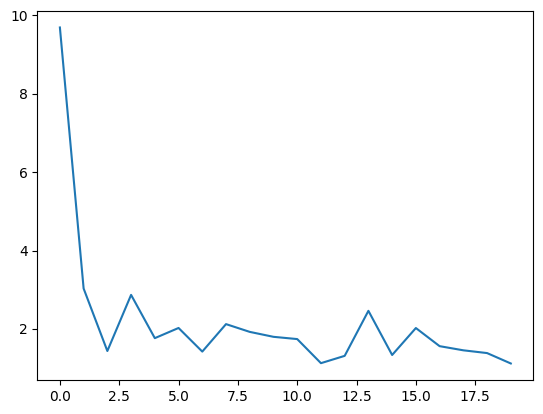

In [14]:
history_data = pd.DataFrame(history.history)
history_data['loss'].plot();

In [15]:
y_predict = np.around(model.predict(X_test))
print(y_test.to_list()[:5])
print(y_predict[:5])

74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[114, 4, 107, 50, 54]
[[114.]
 [  3.]
 [107.]
 [ 49.]
 [ 54.]]


In [16]:
mae = round(mean_absolute_error(y_test, y_predict),3)
print(mae)

0.496
